In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
#caffe_root = '/home/spiorf/caffe/build'  # this file is expected to be in {caffe_root}/examples
import sys
#sys.path.insert(0, '/root/caffe/build/python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os



In [3]:
caffe.set_mode_cpu()
net = caffe.Net('/Users/spiorf/Downloads/deploy.prototxt',
                '/Users/spiorf/Downloads/bvlc_googlenet.caffemodel',
                caffe.TEST)

# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.float32([104.0, 116.0, 122.0])) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [21]:


# set net to batch size of 50
net.blobs['data'].reshape(50,3,224,224)



In [31]:
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image('/Users/spiorf/Desktop/Scrivania/circuit.jpg'))
out = net.forward()
print("Predicted class is #{}.".format(out['prob'].argmax()))

Predicted class is #688.


In [23]:
blobs = net.blobs.keys()
blob_len=len(blobs)

In [25]:
for i in xrange(blob_len):
    print i, blobs[i]

0 data
1 conv1/7x7_s2
2 pool1/3x3_s2
3 pool1/norm1
4 conv2/3x3_reduce
5 conv2/3x3
6 conv2/norm2
7 pool2/3x3_s2
8 pool2/3x3_s2_pool2/3x3_s2_0_split_0
9 pool2/3x3_s2_pool2/3x3_s2_0_split_1
10 pool2/3x3_s2_pool2/3x3_s2_0_split_2
11 pool2/3x3_s2_pool2/3x3_s2_0_split_3
12 inception_3a/1x1
13 inception_3a/3x3_reduce
14 inception_3a/3x3
15 inception_3a/5x5_reduce
16 inception_3a/5x5
17 inception_3a/pool
18 inception_3a/pool_proj
19 inception_3a/output
20 inception_3a/output_inception_3a/output_0_split_0
21 inception_3a/output_inception_3a/output_0_split_1
22 inception_3a/output_inception_3a/output_0_split_2
23 inception_3a/output_inception_3a/output_0_split_3
24 inception_3b/1x1
25 inception_3b/3x3_reduce
26 inception_3b/3x3
27 inception_3b/5x5_reduce
28 inception_3b/5x5
29 inception_3b/pool
30 inception_3b/pool_proj
31 inception_3b/output
32 pool3/3x3_s2
33 pool3/3x3_s2_pool3/3x3_s2_0_split_0
34 pool3/3x3_s2_pool3/3x3_s2_0_split_1
35 pool3/3x3_s2_pool3/3x3_s2_0_split_2
36 pool3/3x3_s2_pool3/

In [30]:


plt.imshow(transformer.deprocess('prob', net.blobs['data'].data[49]))




Exception: prob is not one of the net inputs: {'data': (10L, 3L, 224L, 224L)}

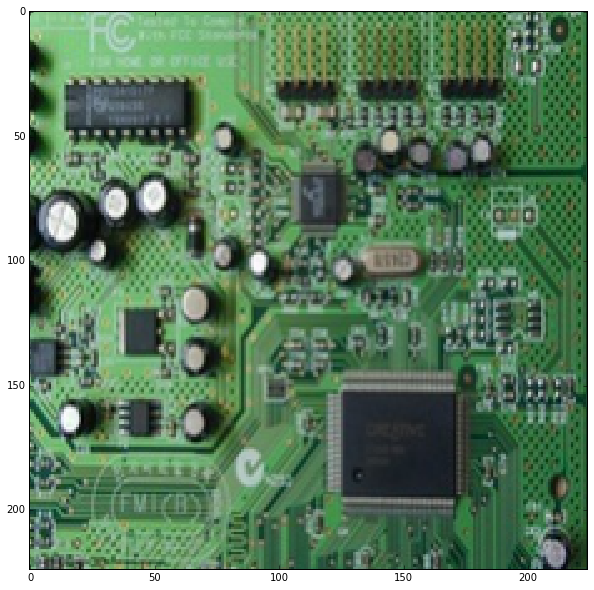

In [19]:
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[1]))